![thibault-penin-AWOl7qqsffM-unsplash-scaled.webp](attachment:thibault-penin-AWOl7qqsffM-unsplash-scaled.webp)

# NETFLIX
Netflix, Inc. is an American technology & media-services provider and production company headquartered in Los Gatos, California, founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. The company's primary business is its subscription-based streaming service which offers online streaming of a library of films and television programs, including those produced in-house.[14] As of April 2020, Netflix had over 193 million paid subscriptions worldwide, including 73 million in the United States.[15] It is available worldwide except in the following: mainland China (due to local restrictions), Iran, Syria, North Korea, and Crimea (due to U.S. sanctions)

# If you like please upvote

In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [31]:
# Load the dataset
dataset = pd.read_csv("input/netflix_titles.csv")

In [32]:
# First 5 rows
dataset.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

# EDA - Exploratory Data Analysis

In [33]:
# Some important information
print(dataset.info())

print("---------------------")
print("---------------------")

# Sum of Null values
print(dataset.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None
---------------------
---------------------
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration      

In [34]:
# fill the null value
def fill_null(colname,fillvalue):
    dataset[colname].fillna(fillvalue, inplace=True)

In [35]:
# Fill director column
fill_null("director", "Unknown")
# Fill cast column
fill_null("cast", "Unknown")
# Fill country column
fill_null("country", "Unknown")

In [36]:
# Frequency for movie and tv series release
def yearly_release(MovieOrShow):
    movie_release = dataset[dataset["type"]==MovieOrShow][["release_year"]]
    movie_release["release_year"].value_counts()[:20].plot(kind="bar", color="#fb732c", figsize=(15,7))
    plt.title(f"Frequency of {MovieOrShow}", fontweight="bold")

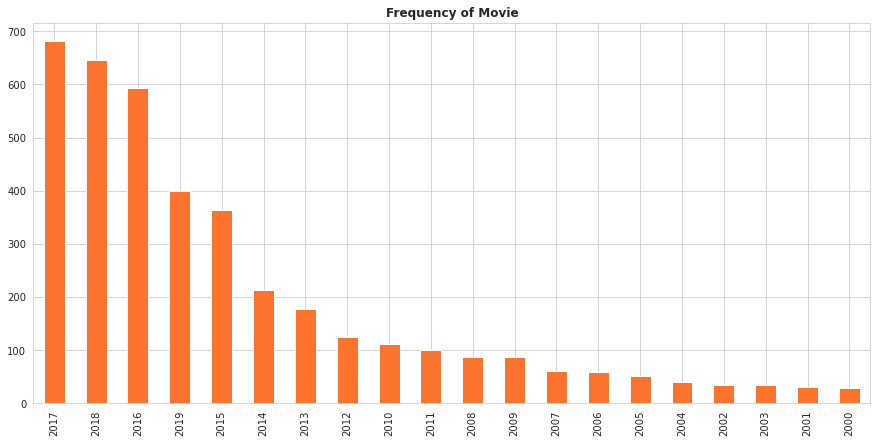

In [37]:
# Movie relsease yearly
yearly_release("Movie")

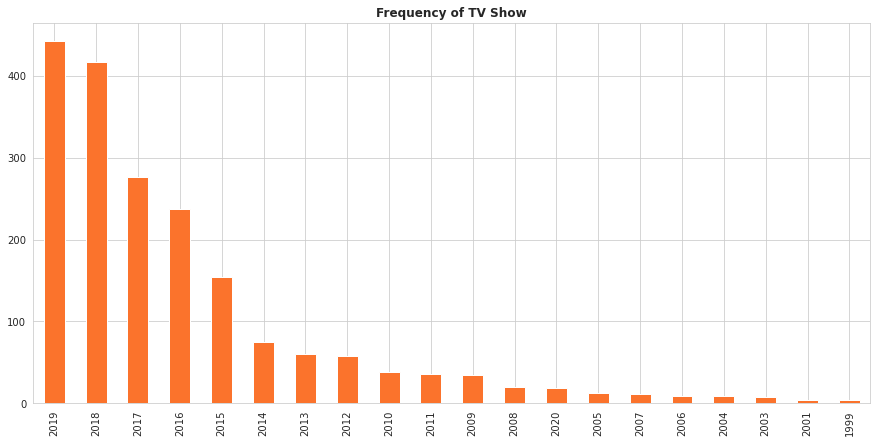

In [38]:
# Tv Show release Yearly
yearly_release("TV Show")

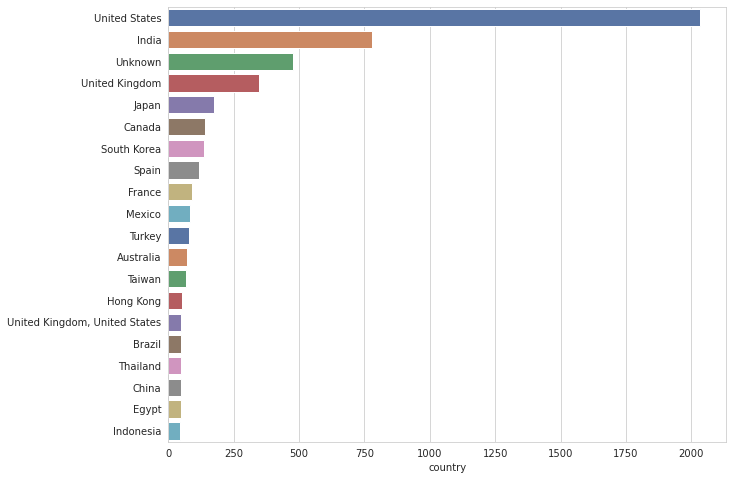

In [39]:
#top 20 countries
country_movie = dataset["country"].value_counts()[:20]
plt.subplots(figsize=(10,8))
sns.barplot(y=country_movie.index, x=country_movie, palette="deep", data=dataset)

# Most of the movie or show produced from United States. 2nd position India

In [40]:
# Content Based on Age

def rating_plot(title, height, h_lim=None):
    ratofmortv = dataset[dataset["type"]==title]
    rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
    movie_rating = ratofmortv['rating'].value_counts()[rating_order]

    fig, ax = plt.subplots(figsize=(10,6), dpi=100)
    if h_lim:
        ax.set_ylim(0, h_lim)
    ax.bar(movie_rating.index, movie_rating, color="#e0e0e0", width=0.52, edgecolor="black")
    
    color = ["green", "blue", "orange", "red"]
    span_range = [[0,2], [3,6], [7,8],[9,11]]
    
    for idx, sub_title in enumerate(["Little Kid", "Older Kid", "Tenns", "Mature"]):
        ax.annotate(sub_title, xy=(sum(span_range[idx])/2, height), xytext=(0,0), textcoords="offset points", va="center", ha="center", color="b", fontsize=16, fontweight="bold")
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
        ax.set_title(f'Distribution of {title} Rating', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))

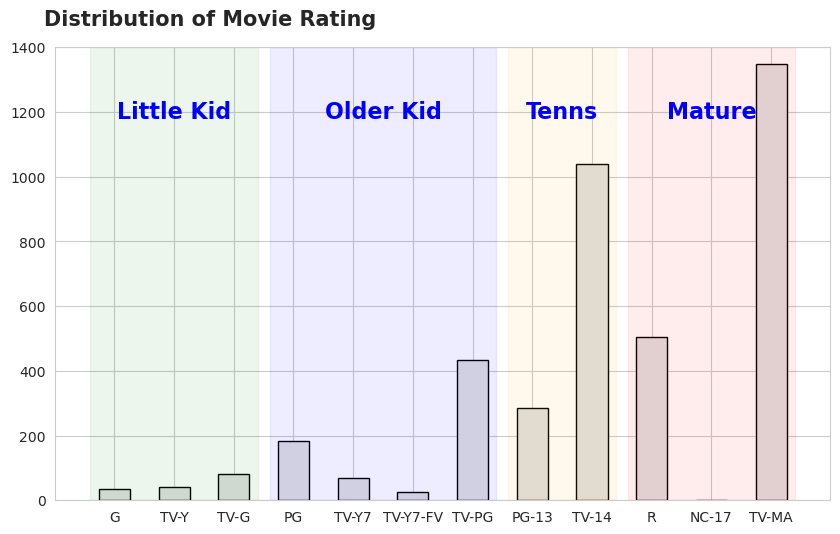

In [41]:
# For Movie 
rating_plot("Movie", 1200, 1400)

# Netflix has lot of Mature content
## "TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only. Using this rating, the TVPG warns viewers that the show's content contains foul language, graphic violence, graphic sexual activity or any combination of these elements.

## "TV-14" This rating contains mild to strong realistic violence (including some blood-letting), sexual references (including censored and/or partial nudity and medium to high-level implied scenes of sexual intercourse), mild to moderate use of language (strong language is usually censored using a "bleep censor"), and sexual innuendo.  

In [42]:
# different countries and their watching rating

def co_rat(*argv):
    country1 = argv[0]
    country2 = argv[1]
    country3 = argv[2]
    plt.subplots(figsize=(12,6))
    plt.xticks(rotation=90)

    newdataset = dataset[(dataset["country"]==country1) | (dataset["country"]==country2) | (dataset["country"]==country3)][["country", "type", "rating"]]
    sns.countplot(x=newdataset["rating"], hue=newdataset["country"], data=newdataset)

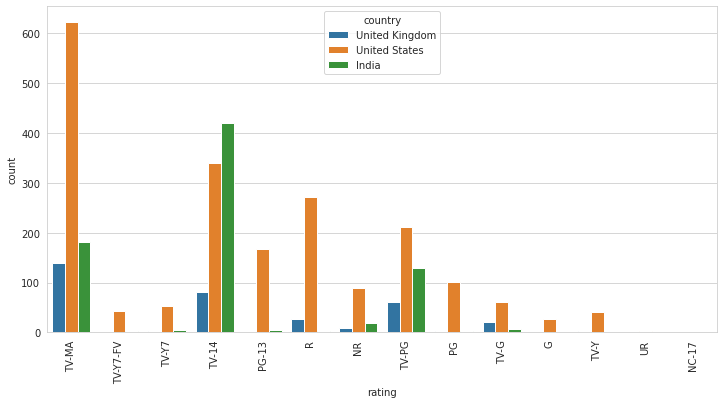

In [43]:
co_rat("United States", "India", "United Kingdom")

In [44]:
# some old movies from 1970 to back
OldMovie = dataset[(dataset["type"]=="Movie") & (dataset["release_year"] <= 1970)].sort_values(by="release_year", ascending=False)[["title", "duration", "rating", "release_year"]]
Old_Movie = pd.DataFrame(OldMovie)

In [45]:
Old_Movie

title duration rating  \
829                                         The Cruise   66 min  TV-PG   
2749                                            Prince  152 min  TV-14   
3595                                         True Grit  128 min      G   
1180                      Once Upon a Time in the West  166 min  PG-13   
3496                           Chitty Chitty Bang Bang  146 min      G   
1403                                   Rosemary's Baby  137 min      R   
847                               Westerplatte Resists   93 min  TV-MA   
3091                   Who's That Knocking at My Door?   90 min      R   
3138                                          Amrapali  116 min  TV-PG   
1360                                    Doctor Zhivago  200 min  PG-13   
1415                                The Cincinnati Kid  103 min  TV-14   
4227                                            Sangam  228 min  TV-14   
3153                                         Professor  163 min  TV-PG   
1389                                            Lolita  153 min      R   
1395                              Mutiny on the Bounty  185 min  TV-PG   
4204                      Jis Desh Men Ganga Behti Hai  181 min  TV-14   
709                                          Singapore  158 min  TV-PG   
1398                                    Ocean's Eleven  127 min  TV-PG   
1353                                     Butterfield 8  108 min  TV-14   
713                                              Ujala  143 min  TV-PG   
1371                                              Gigi  115 min      G   
1354                             Cat on a Hot Tin Roof  108 min     NR   
1369                                  Forbidden Planet   98 min      G   
1401                             Rebel Without a Cause  111 min  PG-13   
2981                                   White Christmas  120 min   TV-G   
2020                                       Thunderbolt   42 min  TV-14   
2930                                      The Stranger   94 min  TV-PG   
2006                                Let There Be Light   58 min  TV-PG   
2009                          Nazi Concentration Camps   59 min  TV-MA   
2005                           Know Your Enemy - Japan   63 min  TV-14   
2012                                        San Pietro   32 min  TV-14   
2019                                 The Negro Soldier   40 min  TV-14   
2017  The Memphis Belle: A Story of a\nFlying Fortress   40 min  TV-PG   
2021                                  Tunisian Victory   76 min  TV-PG   
2026                   WWII: Report from the Aleutians   45 min     NR   
2023                Why We Fight: The Battle of Russia   82 min  TV-14   
2022     Undercover: How to Operate Behind Enemy Lines   61 min  TV-PG   
2013                              The Battle of Midway   18 min   TV-G   
2011                                    Prelude to War   52 min  TV-PG   

      release_year  
829           1970  
2749          1969  
3595          1969  
1180          1968  
3496          1968  
1403          1968  
847           1967  
3091          1967  
3138          1966  
1360          1965  
1415          1965  
4227          1964  
3153          1962  
1389          1962  
1395          1962  
4204          1960  
709           1960  
1398          1960  
1353          1960  
713           1959  
1371          1958  
1354          1958  
1369          1956  
1401          1955  
2981          1954  
2020          1947  
2930          1946  
2006          1946  
2009          1945  
2005          1945  
2012          1945  
2019          1944  
2017          1944  
2021          1944  
2026          1943  
2023          1943  
2022          1943  
2013          1942  
2011          1942

In [46]:
# some old TV Show from 1990 to back
OldTvShow = dataset[(dataset["type"]=="TV Show") & (dataset["release_year"] <= 1990)].sort_values(by="release_year", ascending=False)[["title", "duration", "rating", "release_year"]]
Old_TvShow = pd.DataFrame(OldTvShow)

In [47]:
Old_TvShow

title    duration rating  release_year
6094                  Pee-wee's Playhouse   5 Seasons  TV-PG          1990
3864             Ken Burns: The Civil War    1 Season  TV-14          1990
5982                           Twin Peaks   2 Seasons  TV-MA          1990
1681    The Super Mario Bros. Super Show!    1 Season  TV-Y7          1989
5774                    Highway to Heaven   5 Seasons  TV-PG          1988
369                             High Risk    1 Season   TV-G          1988
3473                           Shaka Zulu    1 Season  TV-14          1986
6016                          Saint Seiya   3 Seasons  TV-PG          1986
982                              Robotech    1 Season  TV-MA          1985
4369                        Ninja Hattori    1 Season  TV-Y7          1981
4273                             El Chavo    1 Season  TV-PG          1979
5830                           Dad's Army  10 Seasons  TV-PG          1977
5669         Monty Python's Flying Circus   4 Seasons     NR          1974
614      Monty Python's Fliegender Zirkus    1 Season  TV-14          1972
5704                            Star Trek   3 Seasons  TV-PG          1968
5980               The Andy Griffith Show   8 Seasons   TV-G          1967
5981  The Twilight Zone (Original Series)   4 Seasons  TV-PG          1963
4079  Pioneers of African-American Cinema    1 Season  TV-14          1946
4292    Pioneers: First Women Filmmakers*    1 Season  TV-PG          1925

In [48]:
# Movie and Director
movie_director = dataset[dataset["type"]=="Movie"]
directorfilm = movie_director["director"].value_counts()[1:]
director_films = pd.DataFrame(directorfilm)

Text(0.5, 1.0, '30 Director and their total Movie count')

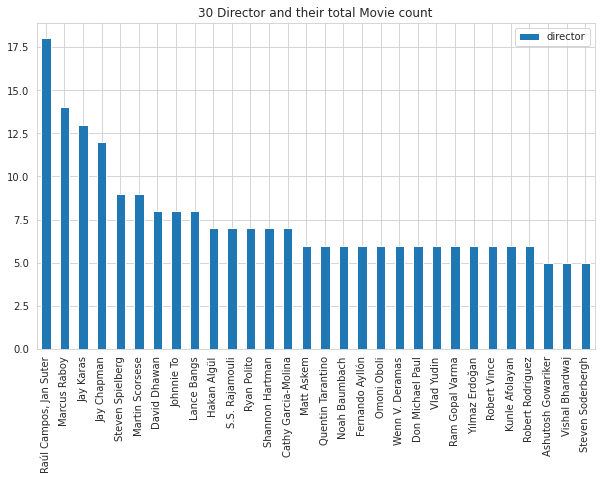

In [49]:
director_films[:30].plot(kind="bar",figsize=(10,6))
plt.title("30 Director and their total Movie count")

In [50]:
# TV Show and Director
tv_director = dataset[dataset["type"]=="TV Show"]
directortv = tv_director["director"].value_counts()[1:]
director_tv = pd.DataFrame(directortv)

Text(0.5, 1.0, '30 Director and their total TV Show count')

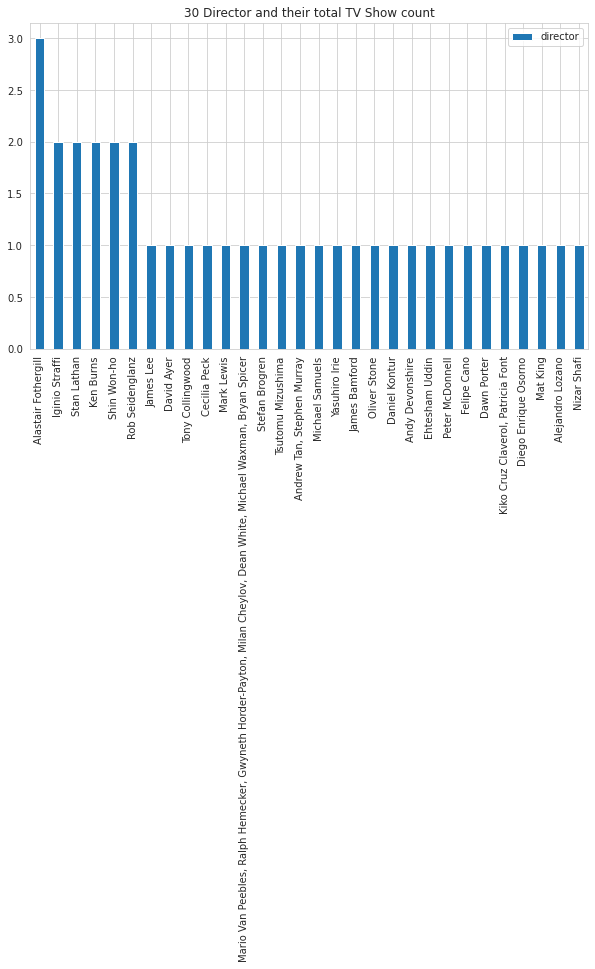

In [51]:
director_tv[:30].plot(kind="bar", figsize=(10,6))
plt.title("30 Director and their total TV Show count")

In [52]:
# content of director

def director_and_movie_tv(name):
    director = dataset.loc[dataset["director"]==name][["country", "rating", "title"]]
    return director

director_and_movie_tv("Raúl Campos, Jan Suter")

country rating                                        title
1337     Mexico  TV-MA                                    Mea Culpa
1655  Argentina  TV-MA                     Fernando Sanjiao: Hombre
1794     Mexico  TV-MA                  Carlos Ballarta: Furia Ñera
2035     Mexico  TV-MA      Sofía Niño de Rivera: Selección Natural
2133  Argentina  TV-MA            Malena Pichot: Estupidez compleja
2134      Chile  TV-MA             Natalia Valdebenito: El especial
2504      Chile  TV-MA  Jani Dueñas: Grandes fracasos de ayer y hoy
2550     Mexico  TV-MA                Sofía Niño de Rivera: Exposed
2783  Argentina  TV-14                Luciano Mellera: Infantiloide
2834     Mexico  TV-MA          Coco y Raulito: Carrusel de ternura
3287  Argentina  TV-MA                  Sebastián Marcelo Wainraich
3303   Colombia  TV-MA               Ricardo Quevedo: Hay gente así
3318     Mexico  TV-MA              Ricardo O'Farrill Abrazo Genial
3355   Colombia  TV-MA               Arango y Sanint: Ríase el show
3792     Mexico  TV-MA                        Daniel Sosa: Sosafado
4596     Mexico  TV-MA           Ricardo O'Farrill: Abrazo navideño
4785     Mexico  TV-MA               Alan Saldaña: Mi vida de pobre
5204  Argentina  TV-MA            Todo lo que sería Lucas Lauriente

# If you like please upvote 